### Tips

eda(탐색적 자료 분석): 데이터가 어떻게 생겼는지, 특징이 무엇인지, 컬림이 어떻게 구성되어있는지 전첵적으로 분석하는 것 (가끔 사용)

___

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ti = pd.read_csv("./datasets/tips.csv")
ti

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [58]:
ti.info  # size -> 일행 수

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [59]:
df = ti.copy()

In [60]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
df["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [62]:
df["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [64]:
## 결측치

sr = df.isna().sum(axis=0)

In [65]:
sr.index

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [66]:
## 중복치

df.duplicated(keep=False).sum()  # 행 단위로 중복 확인

2

In [67]:
## 중복 데이터 뽑아보기

df.loc[df.duplicated(keep=False) == True]  # 중복이 있으면 처음과 마지막 값 중 무엇을 남길 것인가? : keep = 'first', 'last', False

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [68]:
df.shape

(244, 7)

In [69]:
df = df.drop_duplicates(keep='first')
df.shape

(243, 7)

<AxesSubplot:>

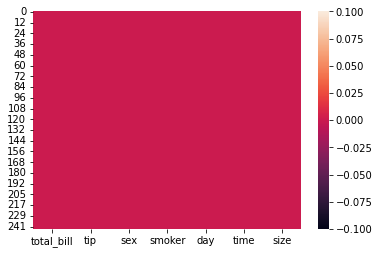

In [70]:
## 결측치 시각화 (순서 위로 옮겨야하지만 귀찮으니 그냥 씀)

sns.heatmap(df.isnull())  # 결측치가 존재하면 선으로 나타남

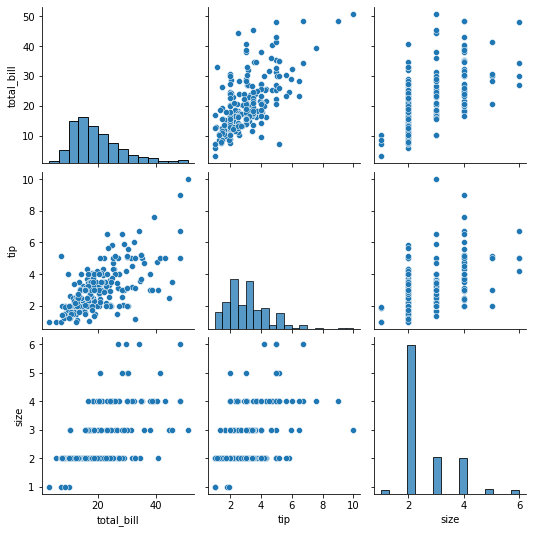

In [73]:
## 산점도 - x,y 축의 관계 확인

sns.pairplot(df)
plt.show()

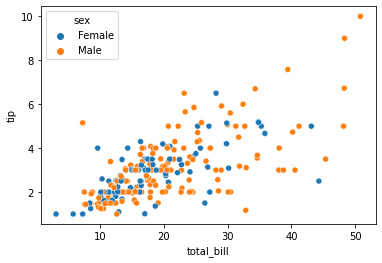

In [74]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.show()

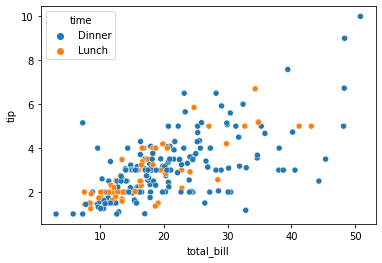

In [75]:
sns.scatterplot(x='total_bill', y='tip', hue='time', data=df)
plt.show()

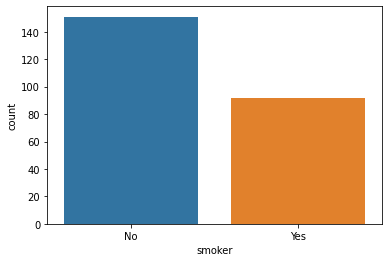

In [76]:
sns.countplot(x='smoker', data=df)
plt.show()

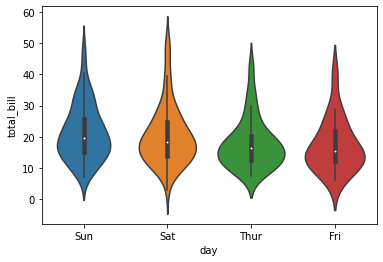

In [77]:
sns.violinplot(x='day', y='total_bill', data=df)
plt.show()

In [80]:
df.corr()  # 각 열 간의 상관계수를 반환

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


<AxesSubplot:>

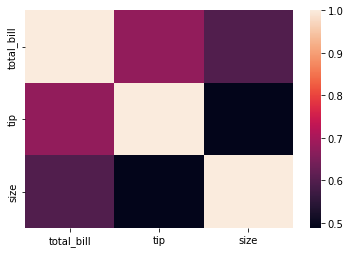

In [79]:
sns.heatmap(df.corr())